**Importing Libraries**

In [24]:
import librosa   #for audio processing
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile #for audio processing
import warnings
warnings.filterwarnings("ignore")

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
import os
os.chdir("/content/drive/MyDrive/SWAHILI/data/train/wav/")
os.listdir()

['SWH-05-20101106',
 'SWH-05-20101107',
 'SWH-05-20101109',
 'SWH-05-20101110',
 'SWH-05-20101111',
 'SWH-05-20101112',
 'SWH-05-20101113',
 'SWH-05-20101121',
 'SWH-05-20101123',
 'SWH-05-20110114',
 'SWH-05-20110123',
 'SWH-05-20110125',
 'SWH-05-20110215',
 'SWH-05-20110317',
 'SWH-05-20110321',
 'SWH-05-20110327',
 'SWH-15-20101103',
 'SWH-15-20101104',
 'SWH-15-20101109',
 'SWH-15-20101113',
 'SWH-15-20101115',
 'SWH-15-20101117',
 'SWH-15-20101130',
 'SWH-15-20101227',
 'SWH-15-20110124',
 'SWH-15-20110126',
 'SWH-15-20110207',
 'SWH-15-20110224',
 'SWH-15-20110303',
 'SWH-15-20110310']

**Loading Data**

In [50]:
train_audio_path = 'SWH-05-20101106/'
samples, sample_rate = librosa.load(train_audio_path+'SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part10.wav')
print(samples)
print(sample_rate)


[0.02953335 0.03225018 0.02603412 ... 0.09593043 0.09478676 0.05775513]
22050


In [52]:
audio, rate=librosa.load(train_audio_path+'SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part10.wav', sr=44100)

**Playing Audio**

In [53]:
ipd.Audio(samples, rate=sample_rate)

audio array using **librosa**

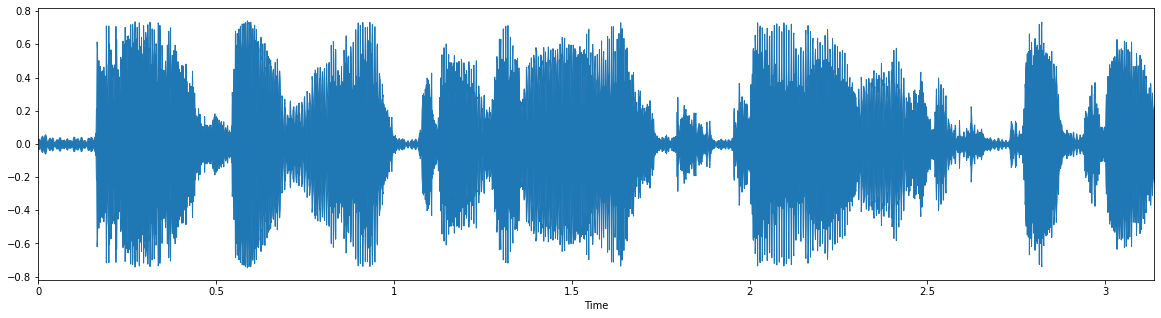

In [54]:
%matplotlib inline
import librosa.display
#Plot the signal:
plt.figure(figsize=(20, 5))
librosa.display.waveplot(samples, sr=sample_rate)

Spectrogram

In [59]:
from numpy.lib.stride_tricks import as_strided
def spectrogram(samples, fft_length=256, sample_rate=2, hop_length=128):
    """Note:
        This is a truncating computation e.g. if fft_length=10,
        hop_length=5 and the signal has 23 elements, then the
        last 3 elements will be truncated.
    """
    assert not np.iscomplexobj(samples), "Must not pass in complex numbers"

    window = np.hanning(fft_length)[:, None]
    window_norm = np.sum(window**2)

    # The scaling below follows the convention of
    # matplotlib.mlab.specgram which is the same as
    # matlabs specgram.
    scale = window_norm * sample_rate

    trunc = (len(samples) - fft_length) % hop_length
    x = samples[:len(samples) - trunc]

    # "stride trick" reshape to include overlap
    nshape = (fft_length, (len(x) - fft_length) // hop_length + 1)
    nstrides = (x.strides[0], x.strides[0] * hop_length)
    x = as_strided(x, shape=nshape, strides=nstrides)

    # window stride sanity check
    assert np.all(x[:, 1] == samples[hop_length:(hop_length + fft_length)])

    # broadcast window, compute fft over columns and square mod
    x = np.fft.rfft(x * window, axis=0)
    x = np.absolute(x)**2

    # scale, 2.0 for everything except dc and fft_length/2
    x[1:-1, :] *= (2.0 / scale)
    x[(0, -1), :] /= scale

    freqs = float(sample_rate) / fft_length * np.arange(x.shape[0])

    return x, freqs

In [56]:
spe_samples,frequency=spectrogram(samples)

In [57]:
frequency

array([0.       , 0.0078125, 0.015625 , 0.0234375, 0.03125  , 0.0390625,
       0.046875 , 0.0546875, 0.0625   , 0.0703125, 0.078125 , 0.0859375,
       0.09375  , 0.1015625, 0.109375 , 0.1171875, 0.125    , 0.1328125,
       0.140625 , 0.1484375, 0.15625  , 0.1640625, 0.171875 , 0.1796875,
       0.1875   , 0.1953125, 0.203125 , 0.2109375, 0.21875  , 0.2265625,
       0.234375 , 0.2421875, 0.25     , 0.2578125, 0.265625 , 0.2734375,
       0.28125  , 0.2890625, 0.296875 , 0.3046875, 0.3125   , 0.3203125,
       0.328125 , 0.3359375, 0.34375  , 0.3515625, 0.359375 , 0.3671875,
       0.375    , 0.3828125, 0.390625 , 0.3984375, 0.40625  , 0.4140625,
       0.421875 , 0.4296875, 0.4375   , 0.4453125, 0.453125 , 0.4609375,
       0.46875  , 0.4765625, 0.484375 , 0.4921875, 0.5      , 0.5078125,
       0.515625 , 0.5234375, 0.53125  , 0.5390625, 0.546875 , 0.5546875,
       0.5625   , 0.5703125, 0.578125 , 0.5859375, 0.59375  , 0.6015625,
       0.609375 , 0.6171875, 0.625    , 0.6328125, 

In [60]:
spe_samples

array([[4.77202303e-02, 8.59170101e-02, 1.13160781e-01, ...,
        5.40852059e-03, 4.56327511e-03, 1.80009392e-02],
       [3.50065761e-02, 9.65115686e-02, 1.28111668e-01, ...,
        6.01471513e-02, 3.21965288e-02, 4.91357058e-02],
       [2.67684766e-04, 6.33479314e-03, 8.89631898e-03, ...,
        8.69934310e-01, 8.44134213e-01, 8.01885275e-01],
       ...,
       [2.34781512e-15, 1.08214029e-18, 2.92930287e-16, ...,
        2.90022747e-15, 4.00494133e-14, 3.48241150e-15],
       [2.32875902e-15, 4.77968285e-17, 2.87732904e-16, ...,
        5.43002589e-15, 3.53132268e-14, 6.79337107e-15],
       [1.37674125e-15, 5.95730127e-18, 3.60137842e-17, ...,
        2.46159791e-15, 2.04124368e-14, 1.04437748e-15]])

In [61]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
def plot_spectrogram_feature(vis_spectrogram_feature):
    # plot the normalized spectrogram
    fig = plt.figure(figsize=(12,5))
    ax = fig.add_subplot(111)
    im = ax.imshow(vis_spectrogram_feature, cmap=plt.cm.jet, aspect='auto')
    plt.title('Spectrogram')
    plt.ylabel('Time')
    plt.xlabel('Frequency')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)
    plt.show()

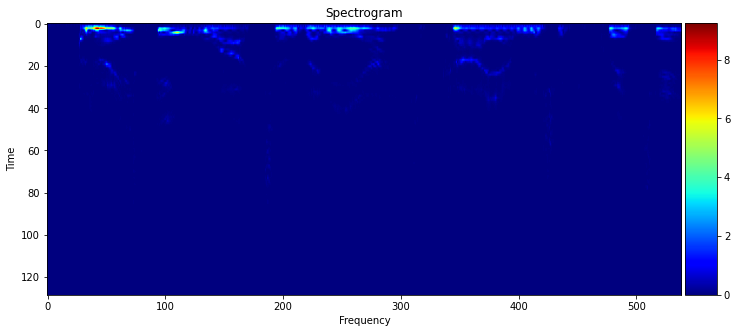

In [62]:
plot_spectrogram_feature(spe_samples)

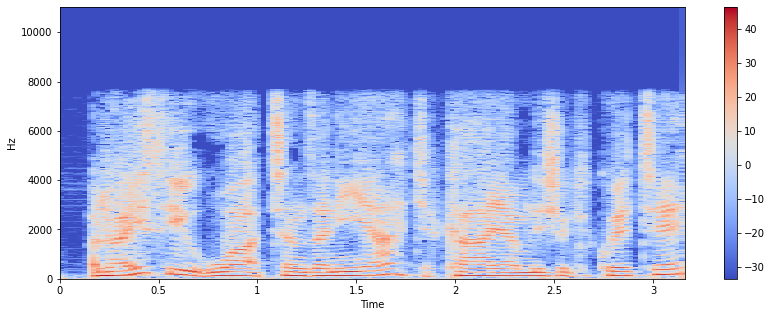

In [63]:
X = librosa.stft(samples)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')
plt.colorbar()

In [64]:
def tran_loader(filename):
  name_to_text = {}
  with open (filename, encoding="utf-8")as f:
    f.readline()
    for line in f:
      name=line.split("</s>")[1]
      name=name.replace('(', '')
      name=name.replace(')', '')
      name=name.replace('\n','')
      name=name.replace(' ','')
      text=line.split("</s>")[0]
      text=text.replace("<s>","")
      name_to_text[name]=text
    return name_to_text

**Data Augumentation**